In [1]:
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from tqdm import tqdm

In [2]:
from utils import accuracy_fn, plot_decision_boundary

In [3]:
from torch.utils.data import DataLoader, TensorDataset

In [4]:
# Crie um conjunto de dados fictício com dois círculos
cmap_ = ListedColormap(['#ee3737', '#198bd9'])
X, y = make_moons(n_samples=1000, noise=0.1)  # aumente o factor e/ou o noise para aumentar a dificuldade
data = np.hstack((X,y.reshape(-1,1)))

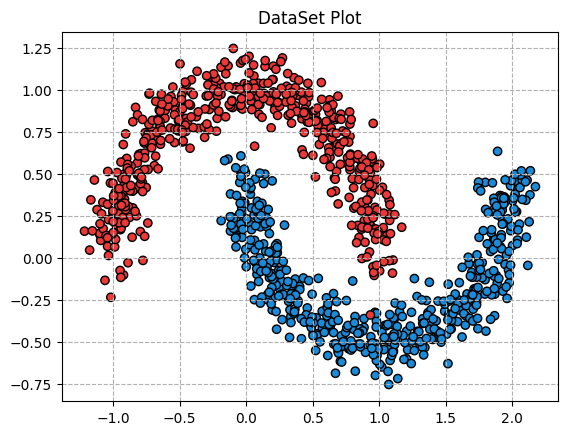

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=data[:, 0], y=data[:, 1], c=data[:, 2], cmap=cmap_, edgecolors='k')
ax.set_title('DataSet Plot')
plt.grid(True, linestyle='dashed')
plt.show()

In [6]:
# Transformando os dados em tensores torch
X = torch.tensor(X)
y = torch.tensor(y)

In [7]:
# separando em treino e teste
n_samples_train = int(0.8 * X.shape[0])
n_samples_test = int(X.shape[0] - n_samples_train)

X_train = X[:n_samples_train, :]
X_train = X_train.to(dtype=torch.float32)
y_train = y[:n_samples_train]
y_train = y_train.to(dtype=torch.float32)

X_test = X[:n_samples_test, :]
X_test = X_test.to(dtype=torch.float32)
y_test = y[:n_samples_test]
y_test = y_test.to(dtype=torch.float32)

In [8]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

batch_size_test = len(test_data.tensors[0])

train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader = DataLoader(test_data, batch_size=batch_size_test)

In [16]:
# 1. Construct a model class that subclasses nn.Module
class MoonsNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=4)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(in_features=4, out_features=4)
        self.layer_3 = nn.Linear(in_features=4, out_features=2)
        self.layer_4 = nn.Linear(in_features=2, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.sigmoid(self.layer_4(x))
        return x.squeeze(1)

model = MoonsNN()

In [17]:
# ajustando a loss (BCE) e o otimizador (SGD)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

  0%|                                                                                         | 0/1500 [00:00<?, ?it/s]

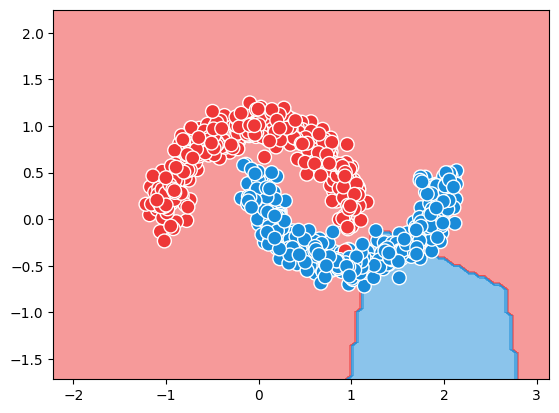

  0%|▏                                                                                | 3/1500 [00:00<02:51,  8.71it/s]

Epoch: 0 | Loss: 0.69261, Accuracy: 50.00% | Test loss: 0.69097, Test acc: 53.00%


  7%|█████▎                                                                          | 99/1500 [00:06<01:44, 13.43it/s]

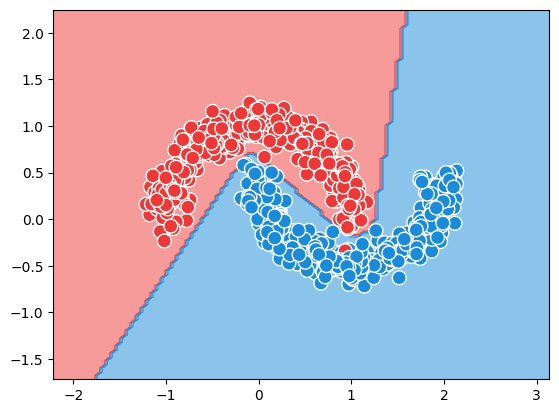

  7%|█████▍                                                                         | 103/1500 [00:07<02:08, 10.83it/s]

Epoch: 100 | Loss: 0.01934, Accuracy: 100.00% | Test loss: 0.01880, Test acc: 100.00%


 13%|██████████▍                                                                    | 199/1500 [00:13<01:22, 15.68it/s]

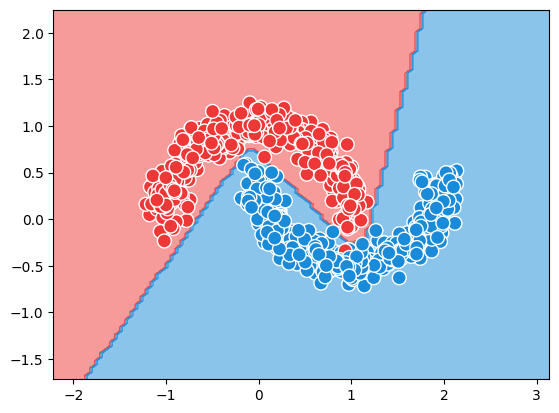

 14%|██████████▋                                                                    | 203/1500 [00:13<01:46, 12.19it/s]

Epoch: 200 | Loss: 0.00800, Accuracy: 100.00% | Test loss: 0.00713, Test acc: 100.00%


 20%|███████████████▋                                                               | 299/1500 [00:20<01:31, 13.13it/s]

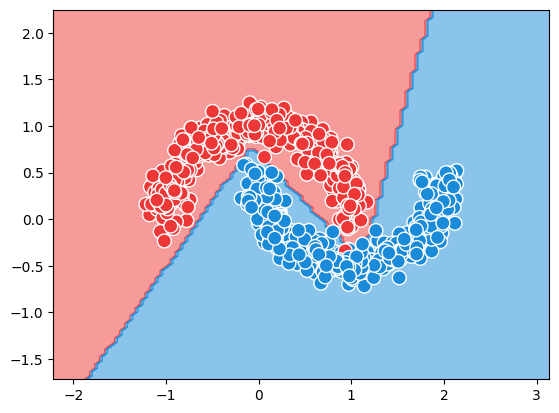

 20%|███████████████▉                                                               | 303/1500 [00:21<02:00,  9.95it/s]

Epoch: 300 | Loss: 0.00384, Accuracy: 100.00% | Test loss: 0.00719, Test acc: 100.00%


 27%|█████████████████████                                                          | 399/1500 [00:27<01:13, 15.04it/s]

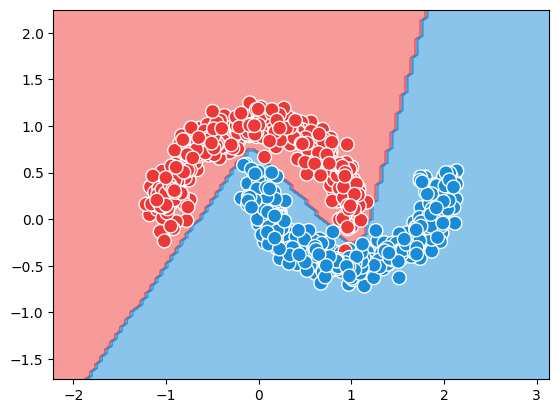

 27%|█████████████████████▏                                                         | 403/1500 [00:28<01:36, 11.34it/s]

Epoch: 400 | Loss: 0.00268, Accuracy: 100.00% | Test loss: 0.00337, Test acc: 100.00%


 33%|██████████████████████████▎                                                    | 499/1500 [00:35<01:00, 16.43it/s]

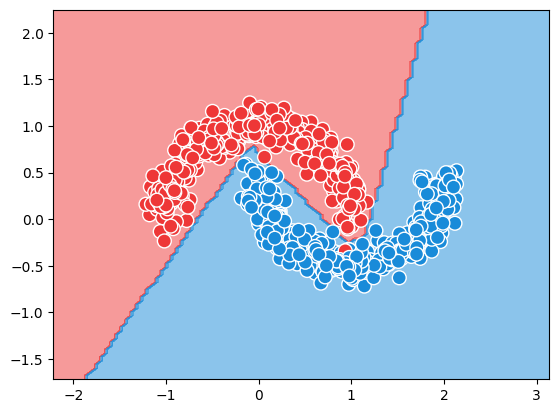

 34%|██████████████████████████▍                                                    | 503/1500 [00:35<01:17, 12.81it/s]

Epoch: 500 | Loss: 0.00250, Accuracy: 100.00% | Test loss: 0.00258, Test acc: 100.00%


 40%|███████████████████████████████▌                                               | 599/1500 [00:42<01:00, 15.00it/s]

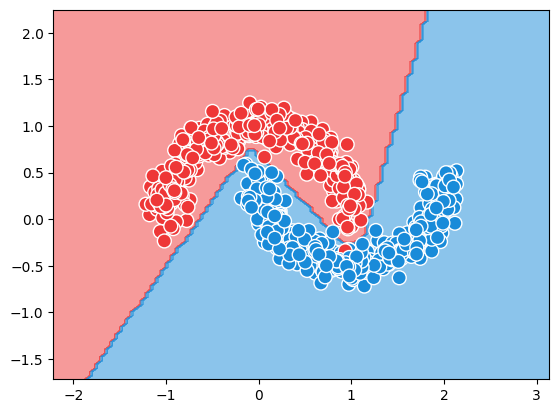

 40%|███████████████████████████████▊                                               | 603/1500 [00:42<01:13, 12.15it/s]

Epoch: 600 | Loss: 0.07369, Accuracy: 100.00% | Test loss: 0.00270, Test acc: 100.00%


 47%|████████████████████████████████████▊                                          | 699/1500 [00:49<01:03, 12.66it/s]

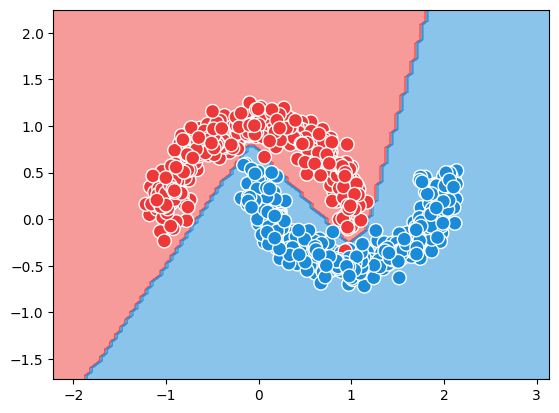

 47%|█████████████████████████████████████                                          | 703/1500 [00:49<01:12, 11.04it/s]

Epoch: 700 | Loss: 0.00087, Accuracy: 100.00% | Test loss: 0.00164, Test acc: 100.00%


 53%|██████████████████████████████████████████                                     | 799/1500 [00:58<01:04, 10.85it/s]

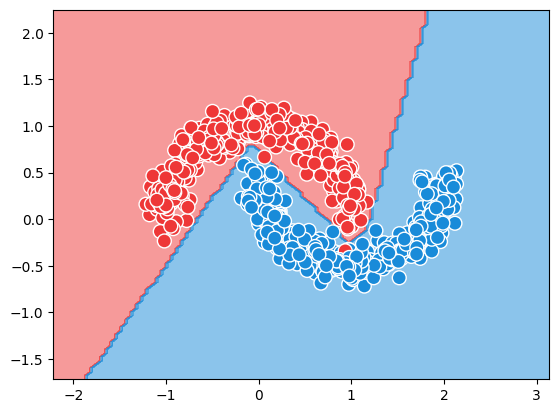

 54%|██████████████████████████████████████████▎                                    | 803/1500 [00:59<01:18,  8.93it/s]

Epoch: 800 | Loss: 0.00683, Accuracy: 100.00% | Test loss: 0.00152, Test acc: 100.00%


 60%|███████████████████████████████████████████████▎                               | 899/1500 [01:07<00:45, 13.19it/s]

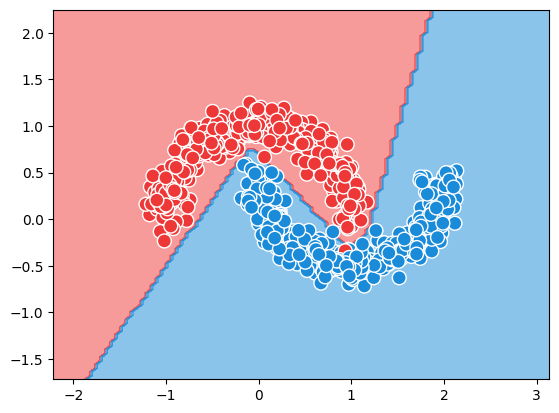

 60%|███████████████████████████████████████████████▌                               | 903/1500 [01:07<00:58, 10.22it/s]

Epoch: 900 | Loss: 0.00111, Accuracy: 100.00% | Test loss: 0.00404, Test acc: 100.00%


 67%|████████████████████████████████████████████████████▌                          | 999/1500 [01:15<00:36, 13.64it/s]

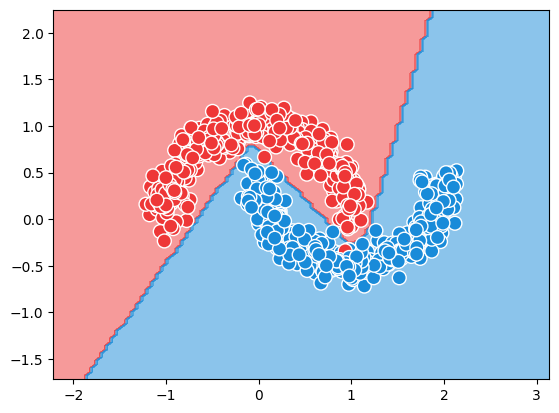

 67%|████████████████████████████████████████████████████▏                         | 1003/1500 [01:16<00:45, 11.01it/s]

Epoch: 1000 | Loss: 0.00120, Accuracy: 100.00% | Test loss: 0.00189, Test acc: 100.00%


 73%|█████████████████████████████████████████████████████████▏                    | 1099/1500 [01:23<00:36, 10.98it/s]

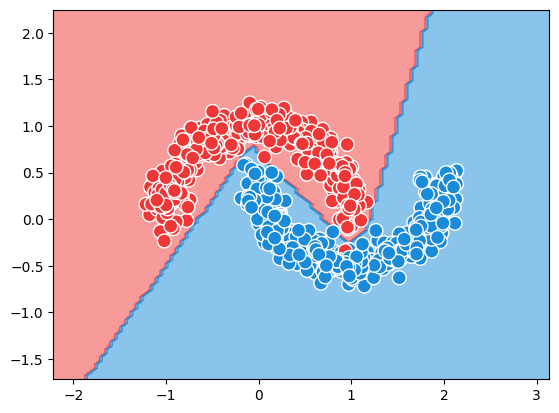

 74%|█████████████████████████████████████████████████████████▎                    | 1103/1500 [01:24<00:44,  8.87it/s]

Epoch: 1100 | Loss: 0.00109, Accuracy: 100.00% | Test loss: 0.00144, Test acc: 100.00%


 80%|██████████████████████████████████████████████████████████████▎               | 1199/1500 [01:32<00:25, 11.97it/s]

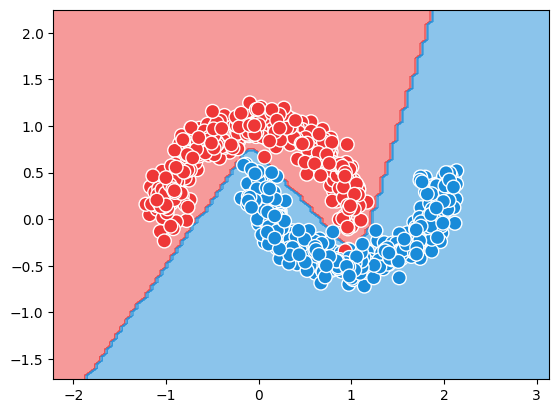

 80%|██████████████████████████████████████████████████████████████▌               | 1203/1500 [01:33<00:34,  8.67it/s]

Epoch: 1200 | Loss: 0.00072, Accuracy: 100.00% | Test loss: 0.00467, Test acc: 100.00%


 87%|███████████████████████████████████████████████████████████████████▌          | 1299/1500 [01:40<00:16, 12.08it/s]

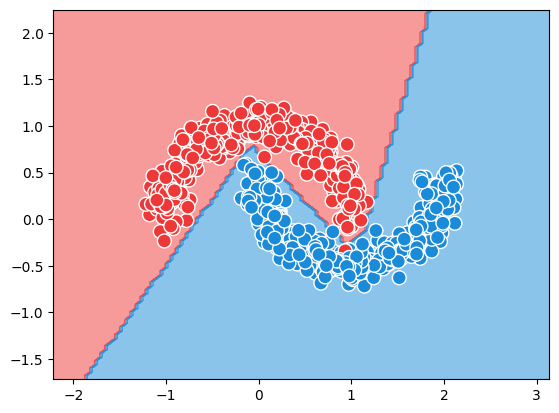

 87%|███████████████████████████████████████████████████████████████████▊          | 1303/1500 [01:41<00:20,  9.47it/s]

Epoch: 1300 | Loss: 0.00061, Accuracy: 100.00% | Test loss: 0.00121, Test acc: 100.00%


 93%|████████████████████████████████████████████████████████████████████████▋     | 1399/1500 [01:48<00:07, 14.00it/s]

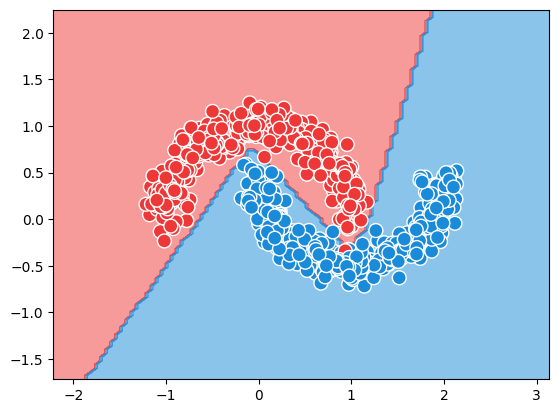

 94%|████████████████████████████████████████████████████████████████████████▉     | 1403/1500 [01:49<00:08, 10.83it/s]

Epoch: 1400 | Loss: 0.00044, Accuracy: 100.00% | Test loss: 0.00222, Test acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:57<00:00, 12.71it/s]


In [18]:
EPOCHS = 1500

for epoch in tqdm(range(EPOCHS)):
    # Train set
    model.train()
    for X, y in train_loader:
        
        y_logits = model(X)
        y_pred = torch.round(y_logits)

        loss = loss_fn(y_logits, y) 
        acc = accuracy_fn(y_true=y, y_pred=y_pred) 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        model.eval()
        # Test set
        X_test, y_test = next(iter(test_loader))
        test_logits = model(X_test)
        test_pred = torch.round(test_logits)
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch %100 == 0:
        plot_decision_boundary(model=model, color_map=cmap_, s=100, dataset=train_data, cols=[0, 1])
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

In [19]:
ex_1 = torch.tensor([[0.11322397,  0.17248329]], dtype=torch.float32)
ex_0 = torch.tensor([[-0.32296138,  0.83740141]], dtype=torch.float32)

model.eval()
with torch.no_grad():
    y_pred_0 = model(ex_0)
    y_pred_1 = model(ex_1)

In [20]:
print(f'Deve ser 0, foi: {torch.round(y_pred_0)} | predição: {y_pred_0.item()}')
print(f'Deve ser 1, foi: {torch.round(y_pred_1)} | predição: {y_pred_1.item()}')

Deve ser 0, foi: tensor([0.]) | predição: 0.0010521028889343143
Deve ser 1, foi: tensor([1.]) | predição: 0.9999812841415405
